### pandas_task

1. 데이터 확인(info 확인)
2. 4분위수 확인
3. 결측치 검사
4. 평균, 중앙, 최빈

In [1]:
import pandas as pd
from scipy.stats import iqr

happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')

In [2]:
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [3]:
print(happiness_df.columns)
print(happiness_df.index)
print(happiness_df.index.values)
print(happiness_df.dtypes)
print("\n")

happiness_df.info()

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')
RangeIndex(start=0, stop=137, step=1)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136]
country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support  

In [4]:
happiness_df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [5]:
hp_mean_df = happiness_df.groupby('region').mean('happiness_score').reset_index()
display(hp_mean_df)

hp_min_df = happiness_df.groupby('region').min('happiness_score').reset_index()
display(hp_min_df)

hp_max_df = happiness_df.groupby('region').max('happiness_score').reset_index()
display(hp_max_df)

hp_std_df = happiness_df.groupby('region')['happiness_score'].std().reset_index()
display(hp_std_df)

,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
4,Middle East and North Africa,5.102143,1.514571,1.081214,0.403846,0.433929,0.099286,0.124786
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.089000,1.069833,0.682500,0.259833,0.486500,0.147167,0.104500
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.071,1.358,0.947,0.355,0.449,0.000,0.000
1,Commonwealth of Independent States,5.330,0.972,1.248,0.291,0.599,0.104,0.018
2,East Asia,5.308,1.379,1.188,0.244,0.407,0.009,0.058
3,Latin America and Caribbean,5.211,0.000,1.044,0.310,0.369,0.065,0.027
4,Middle East and North Africa,2.392,1.144,0.476,0.324,0.123,0.013,0.016
5,North America and ANZ,6.894,1.842,1.460,0.390,0.557,0.210,0.172
6,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059
7,Southeast Asia,4.372,1.025,0.853,0.257,0.460,0.104,0.013
8,Sub-Saharan Africa,3.138,0.531,0.242,0.000,0.117,0.021,0.013
9,Western Europe,5.931,1.708,1.224,0.511,0.248,0.008,0.037


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,6.845,1.823,1.544,0.532,0.728,0.275,0.372
1,Commonwealth of Independent States,6.144,1.664,1.491,0.417,0.740,0.260,0.292
2,East Asia,6.535,1.951,1.494,0.702,0.666,0.239,0.390
3,Latin America and Caribbean,6.609,1.714,1.445,0.511,0.713,0.205,0.254
4,Middle East and North Africa,7.473,2.015,1.521,0.577,0.748,0.229,0.250
5,North America and ANZ,7.123,1.980,1.544,0.541,0.677,0.242,0.471
6,South Asia,5.360,1.422,1.224,0.426,0.685,0.215,0.165
7,Southeast Asia,6.587,2.168,1.354,0.607,0.768,0.422,0.561
8,Sub-Saharan Africa,5.902,1.589,1.428,0.336,0.625,0.332,0.269
9,Western Europe,7.804,2.200,1.620,0.582,0.772,0.272,0.535


,region,happiness_score
0,Central and Eastern Europe,0.559300
1,Commonwealth of Independent States,0.357055
2,East Asia,0.403384
3,Latin America and Caribbean,0.381950
4,Middle East and North Africa,1.263875
5,North America and ANZ,0.108902
6,South Asia,1.180692
7,Southeast Asia,0.732066
8,Sub-Saharan Africa,0.675345
9,Western Europe,0.557576


In [6]:
happiness_df['region'].value_counts()

region
Sub-Saharan Africa                    33
Central and Eastern Europe            22
Western Europe                        20
Latin America and Caribbean           19
Middle East and North Africa          14
Southeast Asia                         9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Commonwealth of Independent States     4
Name: count, dtype: int64

In [7]:
# 결측 데이터 여부 확인(개수 확인)
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [8]:
# 결측 데이터 확인
happiness_df[happiness_df['healthy_life_expectancy'].isna()]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
98,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067


In [9]:
# 결측 데이터의 freedom_to_make_life_choices 평균
# happiness_df[happiness_df['healthy_life_expectancy'].isna()]['freedom_to_make_lifregion_choices'].mean()

In [10]:
# 결측 데이터 대체하기
happiness_df['healthy_life_expectancy'] = happiness_df['healthy_life_expectancy'].fillna(0.3895)

# 결측 데이터 여부 확인(개수 확인)
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [11]:
happiness_Q1 = happiness_df.describe().T.loc['happiness_score', '25%']
happiness_Q3 = happiness_df.describe().T.loc['happiness_score', '75%']
print(happiness_Q1, happiness_Q3)

iqr_value = happiness_Q3 - happiness_Q1
print(iqr_value)

lower_bound = happiness_Q1 - 1.5 * iqr_value
upper_bound = happiness_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

4.724 6.334
1.6099999999999994
정상치 범위: 2.309000000000001 ~ 8.748999999999999


In [12]:
# 이상치 확인(개수)
happiness_df[(happiness_df['happiness_score'] < lower_bound) | (happiness_df['happiness_score'] > upper_bound)].count()

country                         1
region                          1
happiness_score                 1
gdp_per_capita                  1
social_support                  1
healthy_life_expectancy         1
freedom_to_make_life_choices    1
generosity                      1
perceptions_of_corruption       1
dtype: int64

In [13]:
# 이상치 제거
happiness_df = happiness_df[~(happiness_df['happiness_score'] < lower_bound) | (happiness_df['happiness_score'] > upper_bound)]
happiness_df[(happiness_df['happiness_score'] < lower_bound) | (happiness_df['happiness_score'] > upper_bound)].count()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [14]:
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051


In [15]:
hp_mean_df = happiness_df.groupby('region').mean('happiness_score').reset_index()
display(hp_mean_df)

hp_min_df = happiness_df.groupby('region').min('happiness_score').reset_index()
display(hp_min_df)

hp_max_df = happiness_df.groupby('region').max('happiness_score').reset_index()
display(hp_max_df)

hp_std_df = happiness_df.groupby('region')['happiness_score'].std().reset_index()
display(hp_std_df)

,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
4,Middle East and North Africa,5.102143,1.514571,1.081214,0.402821,0.433929,0.099286,0.124786
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.535000,1.154800,0.819000,0.294400,0.583800,0.158000,0.113600
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.071,1.358,0.947,0.355,0.449,0.000,0.000
1,Commonwealth of Independent States,5.330,0.972,1.248,0.291,0.599,0.104,0.018
2,East Asia,5.308,1.379,1.188,0.244,0.407,0.009,0.058
3,Latin America and Caribbean,5.211,0.000,1.044,0.310,0.369,0.065,0.027
4,Middle East and North Africa,2.392,1.144,0.476,0.324,0.123,0.013,0.016
5,North America and ANZ,6.894,1.842,1.460,0.390,0.557,0.210,0.172
6,South Asia,4.036,0.979,0.513,0.158,0.511,0.120,0.086
7,Southeast Asia,4.372,1.025,0.853,0.257,0.460,0.104,0.013
8,Sub-Saharan Africa,3.138,0.531,0.242,0.000,0.117,0.021,0.013
9,Western Europe,5.931,1.708,1.224,0.511,0.248,0.008,0.037


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,6.845,1.823,1.544,0.532,0.728,0.275,0.372
1,Commonwealth of Independent States,6.144,1.664,1.491,0.417,0.740,0.260,0.292
2,East Asia,6.535,1.951,1.494,0.702,0.666,0.239,0.390
3,Latin America and Caribbean,6.609,1.714,1.445,0.511,0.713,0.205,0.254
4,Middle East and North Africa,7.473,2.015,1.521,0.577,0.748,0.229,0.250
5,North America and ANZ,7.123,1.980,1.544,0.541,0.677,0.242,0.471
6,South Asia,5.360,1.422,1.224,0.426,0.685,0.215,0.165
7,Southeast Asia,6.587,2.168,1.354,0.607,0.768,0.422,0.561
8,Sub-Saharan Africa,5.902,1.589,1.428,0.336,0.625,0.332,0.269
9,Western Europe,7.804,2.200,1.620,0.582,0.772,0.272,0.535


,region,happiness_score
0,Central and Eastern Europe,0.559300
1,Commonwealth of Independent States,0.357055
2,East Asia,0.403384
3,Latin America and Caribbean,0.381950
4,Middle East and North Africa,1.263875
5,North America and ANZ,0.108902
6,South Asia,0.500671
7,Southeast Asia,0.732066
8,Sub-Saharan Africa,0.675345
9,Western Europe,0.557576


<Axes: title={'center': 'std'}, xlabel='region', ylabel='happiness_score'>

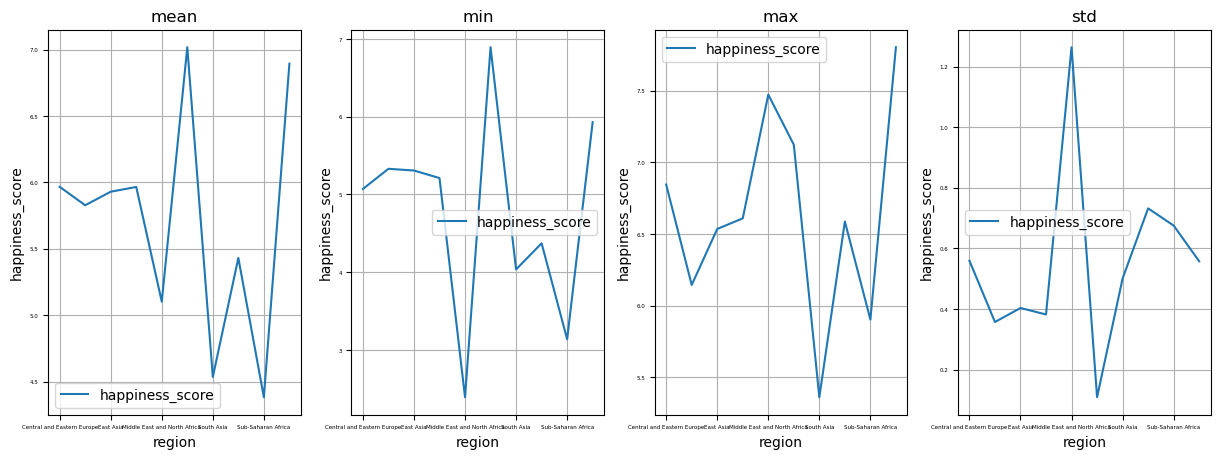

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

hp_mean_df.plot(title='mean', x='region', y='happiness_score', fontsize='4', kind='line', grid=True, ax=axes[0], ylabel="happiness_score")
hp_min_df.plot(title='min', x='region', y='happiness_score', fontsize='4', kind='line', grid=True, ax=axes[1], ylabel="happiness_score")
hp_max_df.plot(title='max', x='region', y='happiness_score', fontsize='4', kind='line', grid=True, ax=axes[2], ylabel="happiness_score")
hp_std_df.plot(title='std', x='region', y='happiness_score', fontsize='4', kind='line', grid=True, ax=axes[3], ylabel="happiness_score")

#### 2023년도 지역 별 행복지수 보고서
- 지역 별 행복점수에서 Middle East and North Africa(중동 및 북아프리카)가 1.263875로 가장 높은 표준편차를 가지고, North America and ANZ(북아메리카 및 뉴질랜드)가 0.108902로 가장 낮은 표준편차를 가진다.
- Middle East and North Africa(중동 및 북아프리카) 1.263875, Southeast Asia(동남아시아)  0.732066, Sub-Saharan Africa(사하라 이남 아프리카) 0.675345, Central and Eastern Europe(동부유럽) 0.559300, Western Europe(서유럽) 0.557576, South Asia(남아시아) 0.500671, East Asia(동아시아) 0.403384, Latin America and Caribbean(남아메리카) 0.381950, Commonwealth of Independent States(독립 국가 연합) 0.357055, North America and ANZ(북아메리카) 0.108902 순으로 나타난다.

- 지역 별 행복점수의 평균은 North America and ANZ(북아메리카 및 뉴질랜드)가 7.018250로 가장 높고, Sub-Saharan Africa(사하라 이남 아프리카)가 4.382485로 가장 낮다.
- 





### 시사점
- Middle East and North Africa의 행복점수는 평균으로 부터 약 1.26 만큼 퍼져 있으며, 행복 점수가 그룹 내에 다양하게 분포되어 있음